**Shubham Gopal Raul**  
*CB.EN.P2AEL23023*<br> 

### <center>21AL722 - Multi Sensor Data Fusion</center>

    Study the effect of different levels of reconstruction of a decomposed image using PrincipalComponent Analysis (PCA) to derive its inferences. The reconstruction should be done for values ofN/32, N/16, N/8, N/4, N/2, and N where N is the number of principal components in thedecomposition process.

In [121]:
#Import required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA
from scipy.stats import stats
import matplotlib.image as mpimg

In [122]:
#Load image file
image = cv2.cvtColor(cv2.imread('Vehicle100.jpeg'), cv2.COLOR_BGR2RGB)

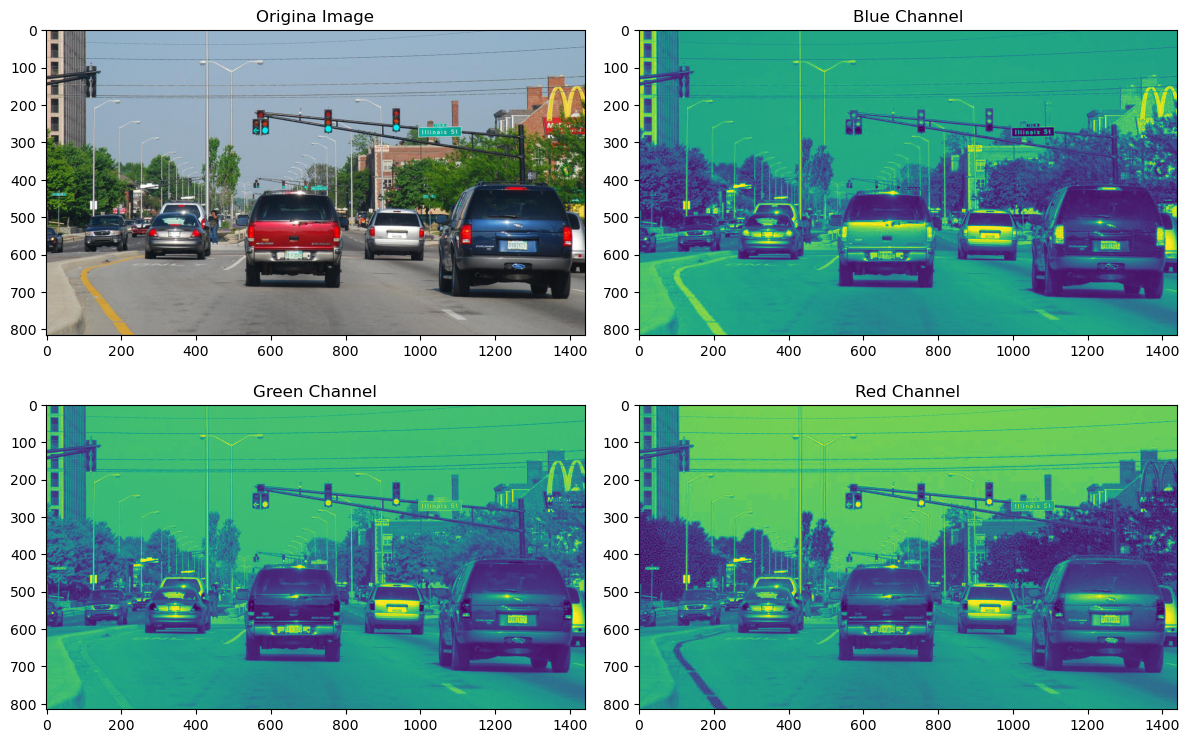

In [123]:
#Image Splint in base channels 
Blue_layer, Green_Layer, Red_Layer = cv2.split(image)
image_data = (('Origina Image', image), ('Blue Channel', Blue_layer), ('Green Channel', Green_Layer), ('Red Channel', Red_Layer))

#Visualize the image
fig = plt.figure(figsize=(12,8))
for i in range(1,5):
    ax = fig.add_subplot(2,2,i)
    ax.set_title(image_data[i-1][0])
    ax.imshow(image_data[i-1][1])
    plt.tight_layout()
fig.savefig('Channel_split.jpg')

In [124]:
#Scale the values of channel between 0 and 1 
Blue_Scaled = Blue_layer/255
Green_Scaled = Green_Layer/255
Red_Scaled = Red_Layer/255
Scaled_Channel = [Blue_Scaled, Green_Scaled, Red_Scaled]

PCA Analysis for N/2 i.e dimension (815, 720)
	-Blue Channel Explained Varience Ratio : 0.9999938500748824
	-Green Channel Explained Varience Ratio : 0.9999938984957779
	-Red Channel Explained Varience Ratio : 0.9999951826745905

PCA Analysis for N/4 i.e dimension (815, 360)
	-Blue Channel Explained Varience Ratio : 0.9982037577369174
	-Green Channel Explained Varience Ratio : 0.998230865366955
	-Red Channel Explained Varience Ratio : 0.9986427415123038

PCA Analysis for N/8 i.e dimension (815, 180)
	-Blue Channel Explained Varience Ratio : 0.988466215978035
	-Green Channel Explained Varience Ratio : 0.9887167696919068
	-Red Channel Explained Varience Ratio : 0.9913914027258109

PCA Analysis for N/16 i.e dimension (815, 90)
	-Blue Channel Explained Varience Ratio : 0.967409878057867
	-Green Channel Explained Varience Ratio : 0.9683572204875535
	-Red Channel Explained Varience Ratio : 0.9761669855017185

PCA Analysis for N/32 i.e dimension (815, 45)
	-Blue Channel Explained Varience Rat

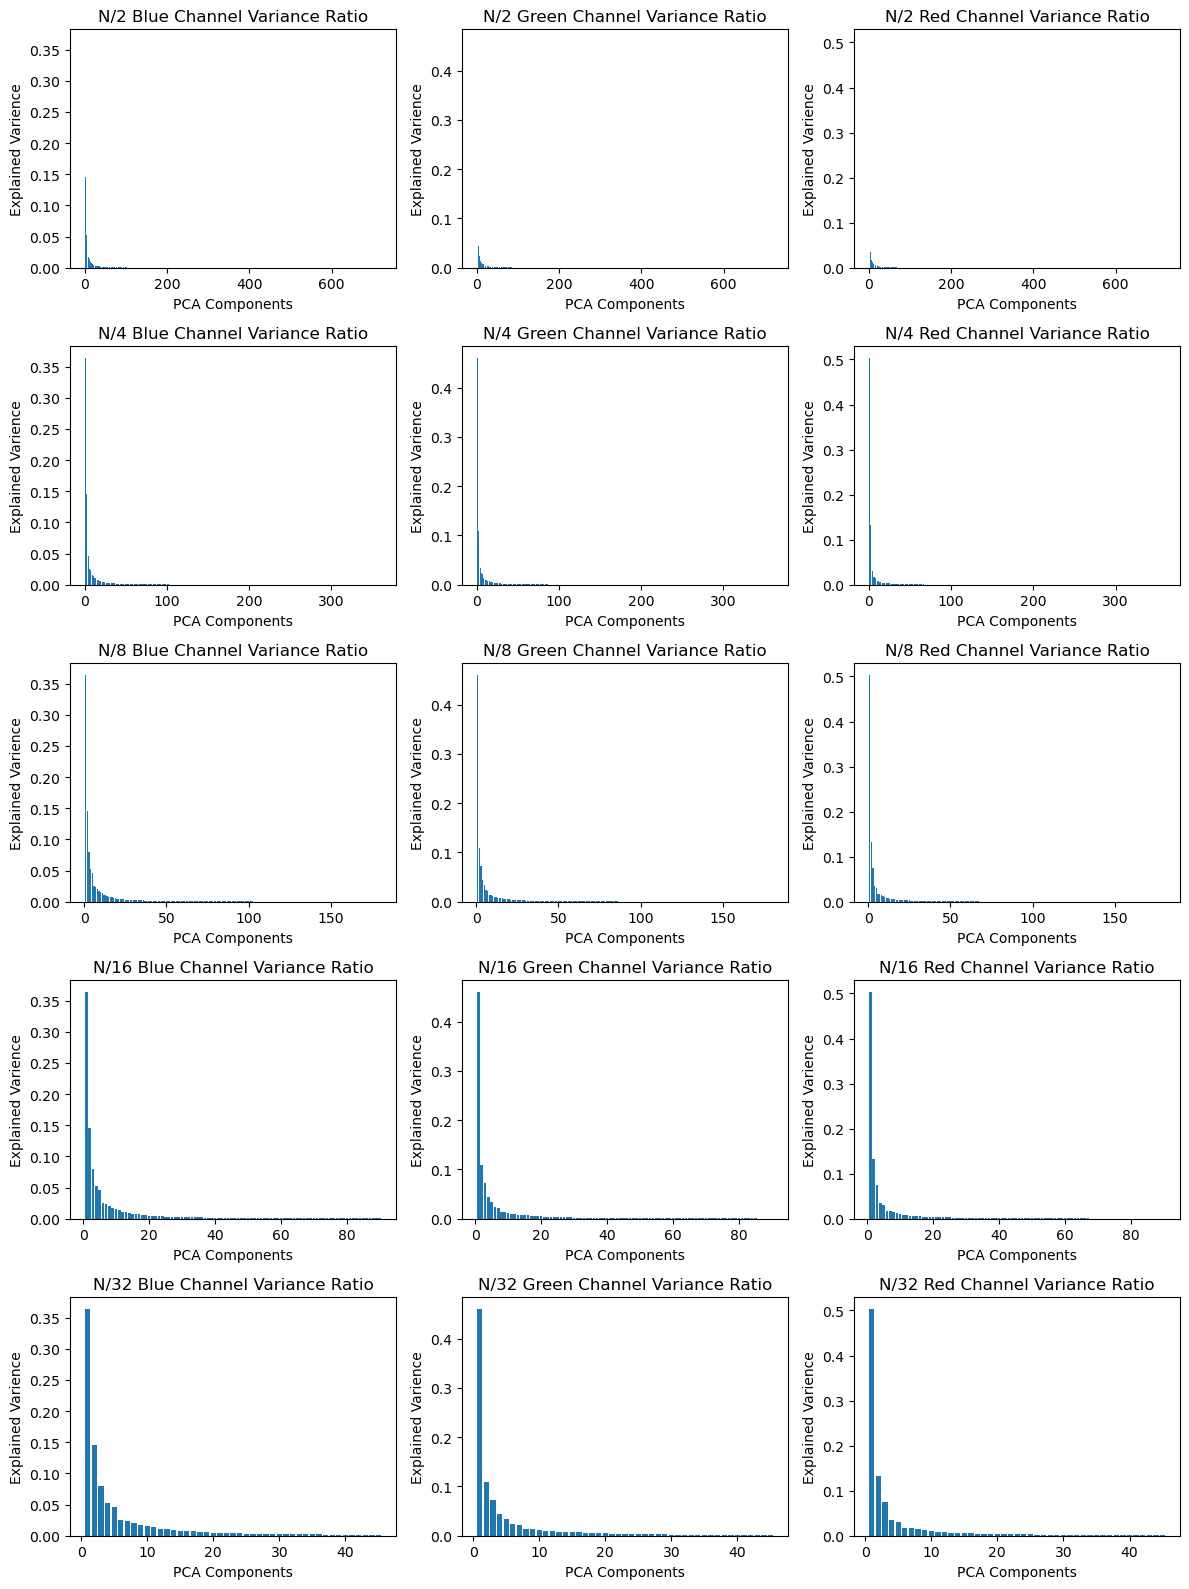

In [125]:
fig, k = plt.figure(figsize=(12,16)),1
Reconstructed_Image = dict()
for i in range(1,6):
    N_comp = int(image.shape[1]/ 2**i)
    print("PCA Analysis for N/{0} i.e. dimension (815, {1})".format(2**i,N_comp))
    Inverted_data = []
    for j in range(3):
        pca = PCA(n_components=N_comp)
        pca = pca.fit(Scaled_Channel[j])
        Trans_Channel = pca.transform(Scaled_Channel[j])
        print('\t-{0} Explained Variance Ratio : {1}'.format(image_data[j+1][0], sum(pca.explained_variance_ratio_)))
        #Plot variance ratio for each channel
        ax = fig.add_subplot(5,3,k)
        ax.set_title('N/'+str(2**i)+' ' + image_data[j+1][0] + ' Variance Ratio')
        ax.set_xlabel('PCA Components')
        ax.set_ylabel('Explained Varience')
        ax.bar(range(1,N_comp+1),pca.explained_variance_ratio_)
        plt.tight_layout()
        k = k+1
        Inverted_data.append(pca.inverse_transform(Trans_Channel))
    Reconstructed_Image[2**i] = (cv2.merge(Inverted_data)) 
    print()
fig.savefig('Explained_Varience.jpg')

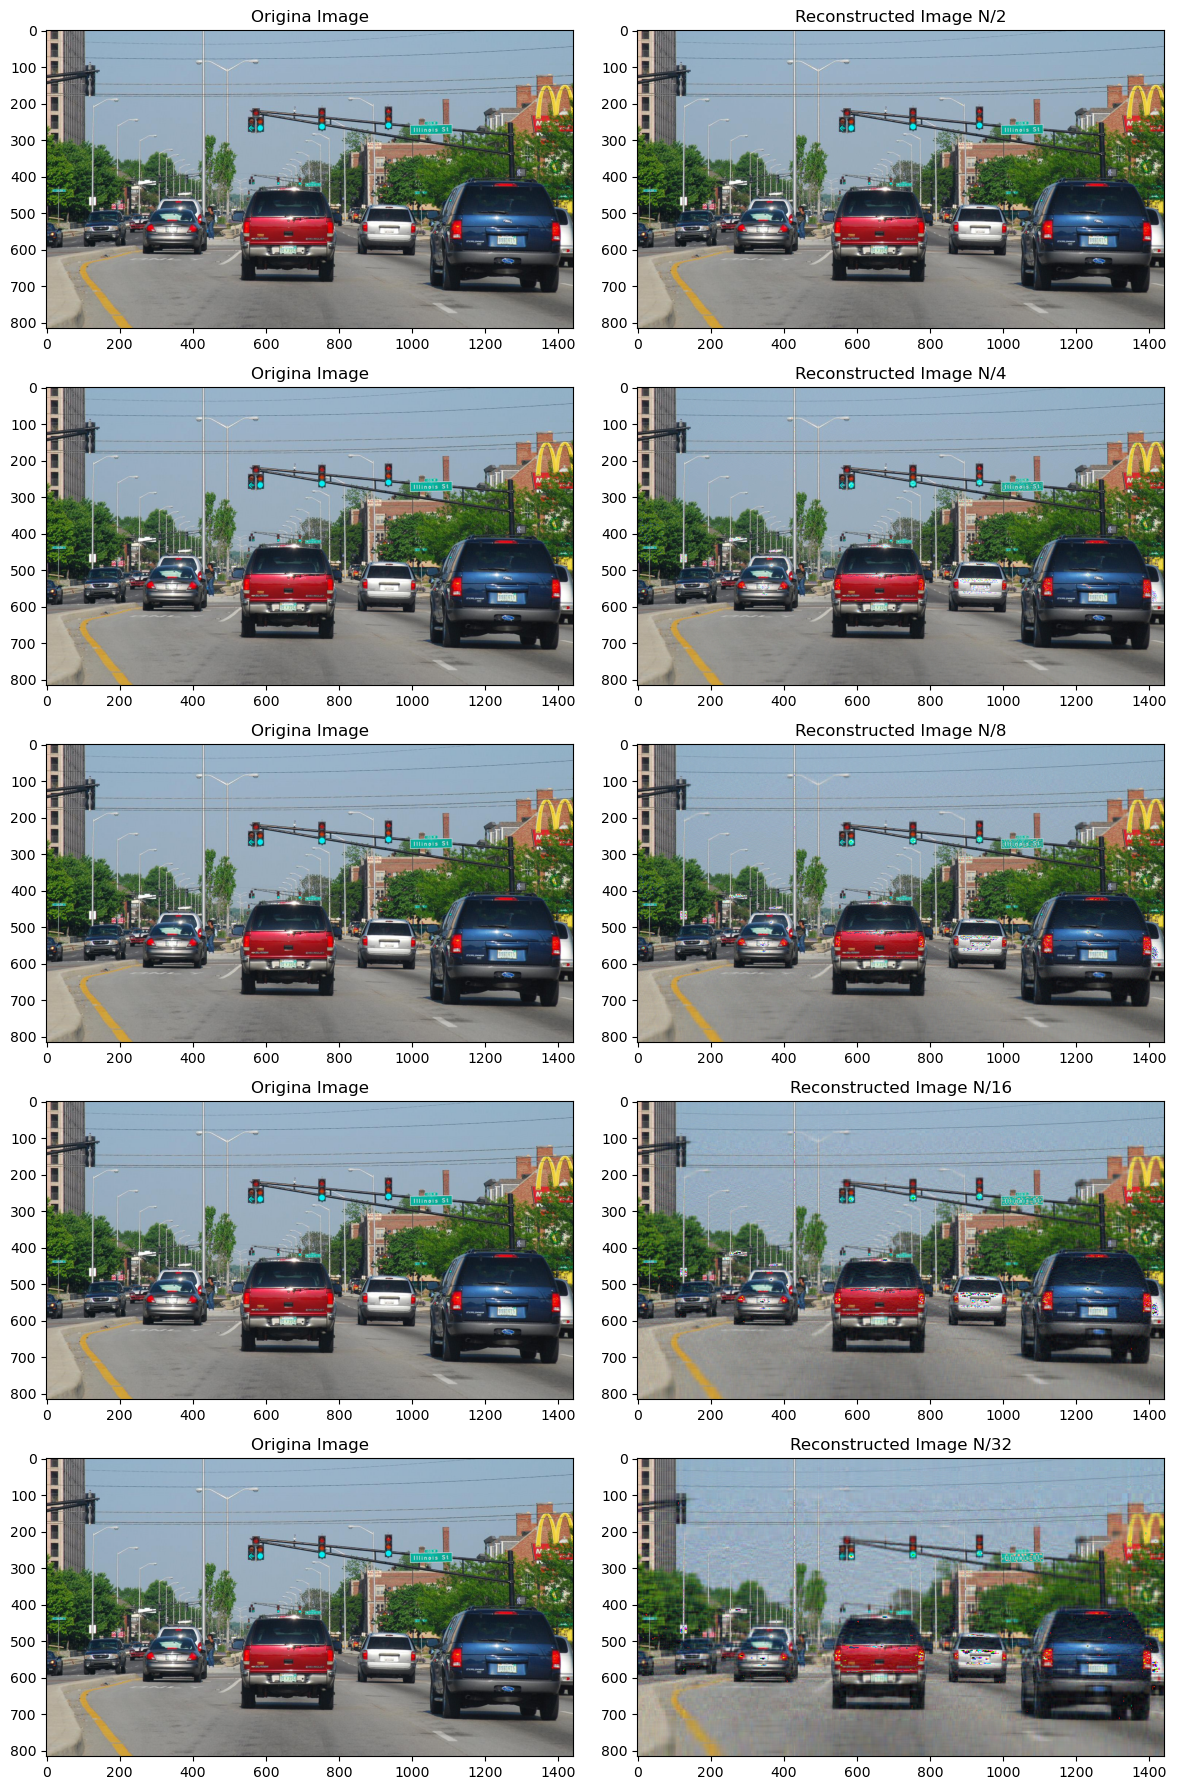

In [126]:
#Visualize the Reconstructed image
fig ,k = plt.figure(figsize=(12,18)), 1
for i in range(1,6):
    ax = fig.add_subplot(5,2,k)
    ax.set_title('Origina Image')
    ax.imshow(image)
    plt.tight_layout()
    k = k+1
    
    ax = fig.add_subplot(5,2,k)
    ax.set_title('Reconstructed Image '+'N/'+str(2**i))
    ax.imshow((Reconstructed_Image[2**i] * 255).astype(np.uint8))
    plt.tight_layout()
    k = k+1
fig.savefig('Reconstructed.jpg')